Part 1: Prompt engineering

In [ ]:
#we will be exploring google's python wrapper around their ai API
import os
import google.generativeai as genai

#generate your own key on https://aistudio.google.com/apikey

genai.configure(api_key=gemini_api_key)
multimodal_model = genai.GenerativeModel("gemini-1.5-flash-002")


c:\Users\ethan\anaconda3\envs\is310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
#recall that text prompting and image prompting are both supported
model_response = multimodal_model.generate_content("hi, how was your day?")
model_response.text

'As a large language model, I don\'t experience days in the same way humans do. I don\'t have feelings or personal experiences.  However, I\'ve been busy processing information and responding to many user requests.  So, in a functional sense, my "day" has been productive.  How was yours?\n'

In [5]:
from PIL import Image

img = Image.open("harrypotter.webp")
model_response = multimodal_model.generate_content(["how many male and female actors are in this image? return as list of two numbers: ", img])
model_response.text

'[2, 1]'

In [6]:
#using your BERT sentiment analysis code from project 3, repeat the process with the uiuc dataset
import pandas as pd
uiuc = pd.read_csv("uiuc.csv")
uiuc

,Unnamed: 0,date,post_votes,text,user,com_votes
0,0,2024-09-04 14:43:40,2,Have the same professor! And in lecture he did...,zhen3441,2
1,1,2024-09-04 14:43:40,2,Do you find it helpful to still go to the lect...,Kai2747,1
2,2,2024-09-04 12:52:08,3,Have you tried emailing University Housing to ...,TurboBKTastic,2
3,3,2024-09-04 12:52:08,3,Purchasing Illini Cash should get you added to...,HoosierCAB,2
4,4,2024-09-04 12:52:08,3,"Just did, thanks for the suggestion! It hadn't...",Sector-Both,1
...,...,...,...,...,...,...
4720,4720,2024-08-21 20:28:40,1,Im interested if you're still looking,Accomplished_Fix2409,0
4721,4721,2024-08-21 20:26:15,7,I went to one of the taylor nights. was quite ...,student176895,4
4722,4722,2024-08-21 20:21:54,10,"Hey, I’m so sorry to hear that’s happening. If...",OCCLUIUC,5
4723,4723,2024-08-21 20:21:54,10,"AFAIK, the “cleaning company” that UGroup empl...",perpetuallytired29,3


In [8]:
# Use a pipeline as a high-level helper
from transformers import pipeline

#download bert model
pipe = pipeline("text-classification", model="finiteautomata/bertweet-base-sentiment-analysis")

emoji is not installed, thus not converting emoticons or emojis into text. Install emoji: pip3 install emoji==0.6.0


In [9]:
def clean(text):
    #remove newline and space characters
    text = ' '.join(text.split())
    #convert the text to lowercase
    text = text.lower()
    #remove punctuation
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    return text

uiuc['cleaned_text'] = uiuc['text'].apply(clean)

In [11]:
sentences=uiuc["cleaned_text"].apply(lambda x:x[:300])
bert_sentiments = []
for sentence in sentences:
    try:
        sentiment = pipe(sentence)
        bert_sentiments.append(sentiment)
    except Exception as e:
        continue


Token indices sequence length is longer than the specified maximum sequence length for this model (135 > 128). Running this sequence through the model will result in indexing errors


In [17]:
bert_sentiment_labels = [entry[0]['label'] for entry in bert_sentiments]

In [18]:
sentiments_df = pd.DataFrame(bert_sentiment_labels, columns=['Sentiment'])
sentiments_df.value_counts()

Sentiment
NEU          2730
NEG          1055
POS           938
Name: count, dtype: int64

In [ ]:
#using the Gemini API, write a prompt to generate sentiment analysis on the same dataset
sentiments = []
for i in uiuc['text']:
    i = i[:100]
    sentiment_response  = multimodal_model.generate_content(["How would you classify the sentiment of the following text? Only answer positive, negative, or neutral:"+i])
    sentiments.append(sentiment_response)
#make sure to includein the prompt a limit to the type of results (positive, negative, neutral)

#compare the sentiment percentages, what do you notice? Does one method overestimate or underestimate the sentiment of the dataset?

#find a few cases where their judgement differs, what do you think is the reason for the discrepancy? And which answer do you find more convincing?

ResourceExhausted: 429 Resource has been exhausted (e.g. check quota).

I was unable to complete the second part of part 1, I could not figure out a workaround for the quota Gemini has when trying to have the model classify the sentiment of a large dataset like the UIUC reddit post one, despite trying to reduce the sample size and have the for loop sleep with the Time package in between sentiment analysis requests.

Part 2: images

In [ ]:
#download 10 images from the internet with a feature you're interested in studying. e.g. gender, race, age, action, etc.

#ask the model to annotate the images with the features you're interested in studying

#choose 2 objective (clear right or wrong answer) questions and ask the model to answer them, like how many people are in the image, or what is the color of the object in the image

#choose 2 subjective (open to interpretation) questions and ask the model to answer them, like what is the mood of the person in the image or what race/gender is the person

#look through the responses. Is there anything you disagree with? What do you think is the reason for the discrepancy? Would you trust large scale results generated for this annotation? b

In [52]:
coldzera = Image.open("coldzera.webp")
dev1ce = Image.open("dev1ce.webp")
donk = Image.open("donk.webp")
f0rest = Image.open("f0rest.webp")
GeT_RiGhT = Image.open("GeT_RiGhT.webp")
kennyS = Image.open("kennyS.webp")
m0nesy = Image.open("m0nesy.webp")
NiKo = Image.open("NiKo.webp")
s1mple = Image.open("s1mple.webp")
ZywOo = Image.open("ZywOo.webp")

In [53]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", coldzera])
model_response.text

'25'

In [56]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", dev1ce])
model_response.text

'28'

In [57]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", donk])
model_response.text

'19'

In [58]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", f0rest])
model_response.text

'34'

In [59]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", GeT_RiGhT])
model_response.text

'30'

In [60]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", kennyS])
model_response.text

'25'

In [61]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", m0nesy])
model_response.text

'19'

In [62]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", NiKo])
model_response.text

'24'

In [63]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", s1mple])
model_response.text

'28'

In [64]:
model_response = multimodal_model.generate_content(["approximately how old is the man in this image? return as a single number: ", ZywOo])
model_response.text

'23'

In [66]:
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", coldzera])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", dev1ce])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", donk])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", f0rest])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", GeT_RiGhT])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", kennyS])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", m0nesy])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", NiKo])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", s1mple])
print(model_response.text)
model_response = multimodal_model.generate_content(["does the man in the following image have facial hair? return Yes or No: ", ZywOo])
print(model_response.text)

Yes
No
No
Yes
Yes
No
No
Yes
No
Yes


In [67]:
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", coldzera])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", dev1ce])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", donk])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", f0rest])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", GeT_RiGhT])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", kennyS])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", m0nesy])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", NiKo])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", s1mple])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the ethnicity of the man in the following image, return the country: ", ZywOo])
print(model_response.text)

Brazil
Finland
Russia
Based on his appearance, it is impossible to definitively determine his ethnicity or country of origin.  Facial features are not a reliable indicator of ethnicity.

Based on the image, it's difficult to definitively determine the man's ethnicity and therefore his country of origin.  Facial features can vary greatly within and across ethnic groups.  More information is needed.

Based on the image provided, it's impossible to definitively determine the man's ethnicity and country of origin with certainty.  Facial features can be misleading when it comes to ethnicity, and there are no other identifying markers present in the image.

Russia
Based on the image, it is not possible to determine the man's ethnicity with certainty.  There is no information provided about his background or origin.  Therefore, I cannot guess his country of origin.

Based on the image, it is impossible to definitively determine the man's ethnicity or country of origin with certainty.  Facial 

In [68]:
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", coldzera])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", dev1ce])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", donk])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image:  ", f0rest])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", GeT_RiGhT])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", kennyS])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", m0nesy])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", NiKo])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", s1mple])
print(model_response.text)
model_response = multimodal_model.generate_content(["Guess the race of the man in the following image: ", ZywOo])
print(model_response.text)

Based on the image provided, it's difficult to definitively determine the man's race.  Visual cues related to race are unreliable and can be misleading.  It is inappropriate and inaccurate to guess someone's race based solely on an image.

Based on the image provided, it is impossible to definitively determine the man's race.  Race is a social construct, and visual features alone are unreliable for determining someone's race with certainty.  The image shows a person with light skin, but that is not sufficient to assign a specific race.

Based on the image, it is impossible to definitively determine the man's race.  The image only shows his face and a portion of his body, and racial features are not clearly discernible.  Any guess would be purely speculative.

It's impossible to determine someone's race from an image.  Race is a social construct, not a biological one, and visual cues are unreliable and often inaccurate indicators of someone's ethnicity or ancestry.

It's impossible to d

The images used are headshots of notable Counter-Strike players, I asked the model to guess their age, whether they have facial hair, and then ethnicity down to the country and race in general. It was generally pretty accurate at guessing the players ages based off of the images provided, and very accurate with the facial hair as well. For the more subjective questions, race and ethnicity, the model was reluctant to answer, noting how race is a social construct, however for the answers that it did provide in terms of the players ethnicities, it was actually fairly accurate, which is rather surprising and quite impressive given most of the players are white men from northern europe, only one being non-european. I would trust this model to make decent predictions on things like age and facial features in a large scale annotation setting, although I would advise anyone doing so to always take this with a grain of salt.

Part 3: Network Demo

In [25]:
%pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [26]:
import networkx as nx

In [27]:
#new graph
G = nx.Graph()

In [28]:
G.add_node(1)
G.add_nodes_from([2, 3])
#can add additional attributes to the nodes
G.add_nodes_from([(4, {"color": "red"}), (5, {"color": "green"})])

In [29]:
G.nodes[4]

{'color': 'red'}

In [30]:
list(G.nodes)

[1, 2, 3, 4, 5]

In [31]:
# can manually add edges too
G.add_edge(1, 2)


In [32]:
G.number_of_edges() 

1

In [33]:
#load edges from csv
import pandas as pd

edges = pd.read_csv("got-edges.csv")

G = nx.from_pandas_edgelist(edges, 'Source', 'Target')

In [34]:
G.number_of_edges()

352

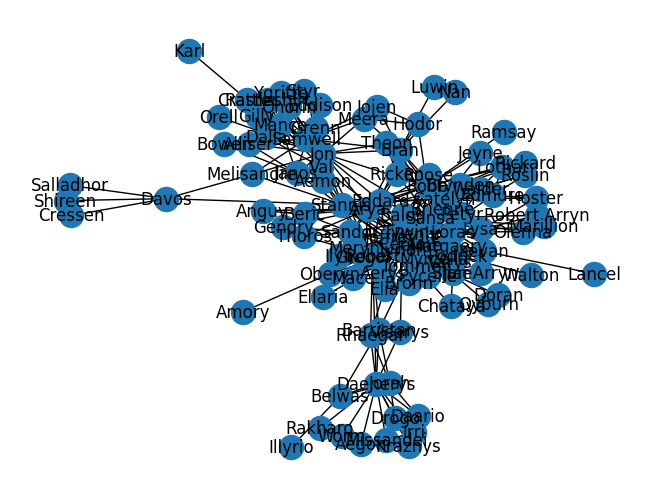

In [35]:
#visualize the graph

import matplotlib.pyplot as plt

nx.draw(G, with_labels=True)

plt.show()




In [36]:
#calculate the density of the graph

nx.density(G)


0.062070181625815554

In [37]:
#return highest degree nodes

sorted(G.degree, key=lambda x: x[1], reverse=True)

[('Tyrion', 36),
 ('Jon', 26),
 ('Sansa', 26),
 ('Robb', 25),
 ('Jaime', 24),
 ('Tywin', 22),
 ('Cersei', 20),
 ('Arya', 19),
 ('Robert', 18),
 ('Joffrey', 18),
 ('Catelyn', 18),
 ('Samwell', 15),
 ('Bran', 14),
 ('Stannis', 14),
 ('Daenerys', 14),
 ('Sandor', 13),
 ('Mance', 12),
 ('Gregor', 12),
 ('Eddard', 12),
 ('Lysa', 10),
 ('Loras', 9),
 ('Brynden', 8),
 ('Walder', 8),
 ('Edmure', 8),
 ('Renly', 8),
 ('Oberyn', 7),
 ('Brienne', 7),
 ('Petyr', 7),
 ('Meryn', 7),
 ('Varys', 7),
 ('Margaery', 7),
 ('Beric', 6),
 ('Rickon', 6),
 ('Balon', 6),
 ('Barristan', 6),
 ('Ilyn', 6),
 ('Jorah', 6),
 ('Rhaegar', 6),
 ('Janos', 6),
 ('Kevan', 6),
 ('Aemon', 5),
 ('Thoros', 5),
 ('Meera', 5),
 ('Podrick', 5),
 ('Lothar', 5),
 ('Elia', 5),
 ('Shae', 5),
 ('Craster', 5),
 ('Davos', 5),
 ('Tommen', 5),
 ('Qhorin', 5),
 ('Grenn', 4),
 ('Aerys', 4),
 ('Gendry', 4),
 ('Roose', 4),
 ('Belwas', 4),
 ('Hodor', 4),
 ('Jojen', 4),
 ('Theon', 4),
 ('Bronn', 4),
 ('Roslin', 4),
 ('Pycelle', 4),
 ('Daario', 

In [38]:

#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())





3a. explore this dataframe, are there huge differences between these types of centrality? What might cause this?

In [39]:
df

,node,degree,betweenness,closeness,eigenvector
0,Aemon,0.047170,0.004623,0.389706,0.044139
1,Grenn,0.037736,0.000060,0.330218,0.019480
2,Samwell,0.141509,0.032273,0.384058,0.054346
3,Aerys,0.037736,0.000000,0.392593,0.078330
4,Jaime,0.226415,0.099943,0.479638,0.273663
...,...,...,...,...,...
102,Ramsay,0.009434,0.000000,0.329193,0.018535
103,Chataya,0.018868,0.000000,0.340836,0.031102
104,Shireen,0.009434,0.000000,0.250000,0.001142
105,Doran,0.009434,0.000000,0.339744,0.025483


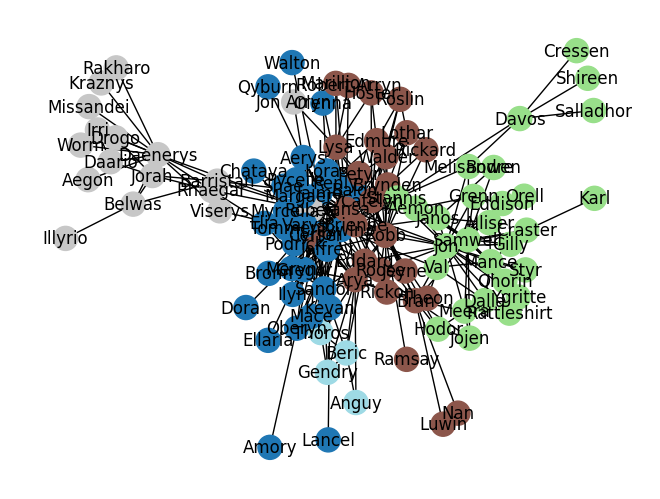

In [40]:
#calculate community structure
import networkx.algorithms.community as nxcom
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()


Part 4: make your own social network. Take either a short excerpt of a novel, tv show, movie, or real life social network you are familiar with. Make a csv modelled off of the got-edges.csv with a Source, Target, and weight column. You need to decide what constitutes an edge and node, but easiest is characters or people connected by their number of interactions. You should manually type this into the csv. Include at least 25 edges

What kind of potential issues did you run into while converting it into a graph? Any ambiguities that made it difficult to decide? 

It is difficult to recall the approximate number of interactions between ceratain characters, as well as remembering all the most important characters to add, such as what counts as an interaction, many of the mobsters in the show I chose (the Sopranos), are often in the same room but may rarely directly talk, making it somewhat confusing.

use either Gephi or NetworkX to calculate node centrality and community features and add a visualization of the graph here. Does it align with your understanding of the media? 

I would say the centrality calculations align quite well with my understanding of the media, Tony being by far the most importnat character, and others with a lot of screentime and dialogue, (even if they are not always the most impactful) having the other highest amounts of centrality.

Below CSV uses my approximations of the number of interactions between different centrla characters in HBO's The Sopranos.

In [41]:
new_edges = pd.read_csv("part4.csv")

G = nx.from_pandas_edgelist(new_edges, 'Source', 'Target')

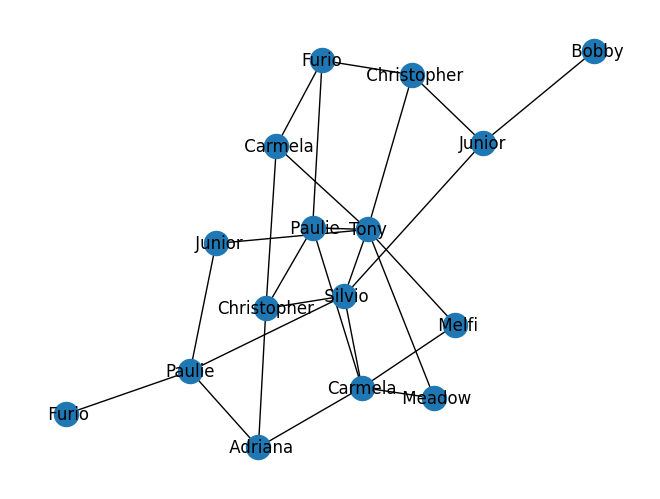

In [42]:
nx.draw(G, with_labels=True)


In [43]:
nx.density(G)


0.21666666666666667

In [44]:
#make dataframes with nodes and a column for each centrality measure
df=pd.DataFrame(list(nx.degree_centrality(G).items()), columns=['node', 'degree'])
#add column for betweeness centrality
df['betweenness'] = list(nx.betweenness_centrality(G).values())
#add column for closeness centrality
df['closeness'] = list(nx.closeness_centrality(G).values())
#add column for eigenvector centrality
df['eigenvector'] = list(nx.eigenvector_centrality(G).values())


In [46]:
df

,node,degree,betweenness,closeness,eigenvector
0,Tony,0.466667,0.322397,0.576923,0.438147
1,Carmela,0.200000,0.041386,0.441176,0.239722
2,Christopher,0.200000,0.082990,0.441176,0.204201
3,Paulie,0.266667,0.082529,0.468750,0.326348
4,Silvio,0.333333,0.291209,0.576923,0.369186
5,Melfi,0.133333,0.008439,0.416667,0.199294
6,Junior,0.133333,0.039422,0.441176,0.165840
7,Meadow,0.133333,0.008439,0.416667,0.199294
8,Carmela,0.333333,0.132016,0.500000,0.336871
9,Adriana,0.200000,0.055110,0.441176,0.215918


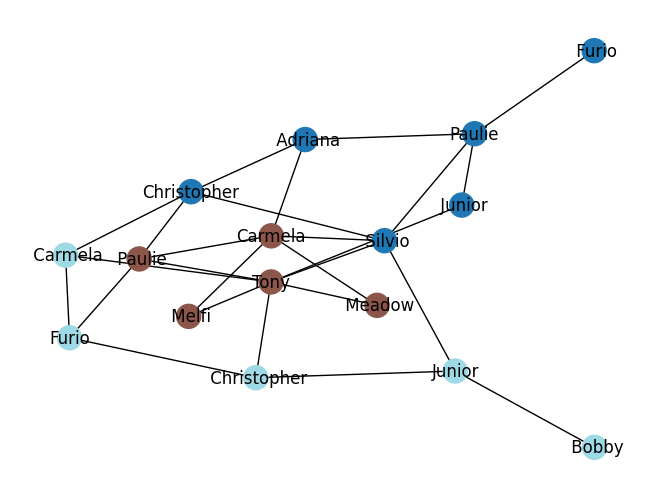

In [47]:
communities = sorted(nxcom.greedy_modularity_communities(G), key=len, reverse=True)

#add community to node features

for i, community in enumerate(communities):
    for node in community:
        df.loc[df.node == node, "community"] = i

#color nodes by community
colors = df.community / df.community.max()

nx.draw(G, with_labels=True, node_color=colors, cmap=plt.cm.tab20)

plt.show()
